In [1]:
from get_data import crawl_top_show_page

In [2]:
URL = r'https://www.setlist.fm/setlists/streetlight-manifesto-6bd68a52.html?page='

all_dates = []
all_setlists = []

for i in range(1, 34):
    dates, setlists = crawl_top_show_page(URL+str(i))

    for date, setlist in zip(dates, setlists):
        if len(setlists) != 0:
            all_dates.append(date)
            all_setlists.append(setlist)


In [3]:
flat_list = [item for sublist in all_setlists for item in sublist]

In [4]:
from mapping import all_clean, all_possible, build_setlist_dict

In [5]:
setlists = [build_setlist_dict(setlist) for setlist in all_setlists]

### Build DataFrame

In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(setlists)

In [7]:
df.index = all_dates
df.index = pd.to_datetime(df.index)

In [8]:
df = df.sort_index()
df = df[all_clean]

In [9]:
df.sum(axis=1).value_counts().sort_index()

0     95
1      2
2      1
3      1
4      1
5      2
7      4
8     11
9      8
10     2
11     1
12     5
13     7
14    31
15    49
16    58
17    31
18    17
19     1
20     2
23     1
dtype: int64

In [10]:
df[(df.sum(axis=1) < 5) & (df.sum(axis=1) > 0)].T

,2011-02-28 00:00:00,2013-10-03 00:00:00,2013-11-12 00:00:00,2017-05-19 00:00:00,2017-09-16 00:00:00
everything went numb,0,0,0,0,0
that'll be the day,0,0,0,0,0
point / counterpoint,1,0,0,0,0
if and when we rise again,0,0,0,0,0
"a better place, a better time",0,0,0,0,0
we are the few,0,0,0,0,0
"failing, flailing",0,0,0,0,0
here's to life,0,0,0,0,0
a moment of silence,0,0,0,0,0
a moment of violence,0,0,0,0,0


https://www.setlist.fm/setlist/streetlight-manifesto/2013/waiting-room-buffalo-ny-13c7d159.html

In [11]:
trimmed = df[df.sum(axis=1) >= 7]

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
import seaborn as sns

In [14]:
from itertools import groupby

groups = groupby(trimmed.index, lambda x: str(x)[3])

In [15]:
year_indexes = [0]

for year, group in groups:
    year_indexes.append(year_indexes[-1] + len(list(group)))

year_indexes

[0, 19, 57, 78, 122, 131, 152, 167, 179, 209, 228]

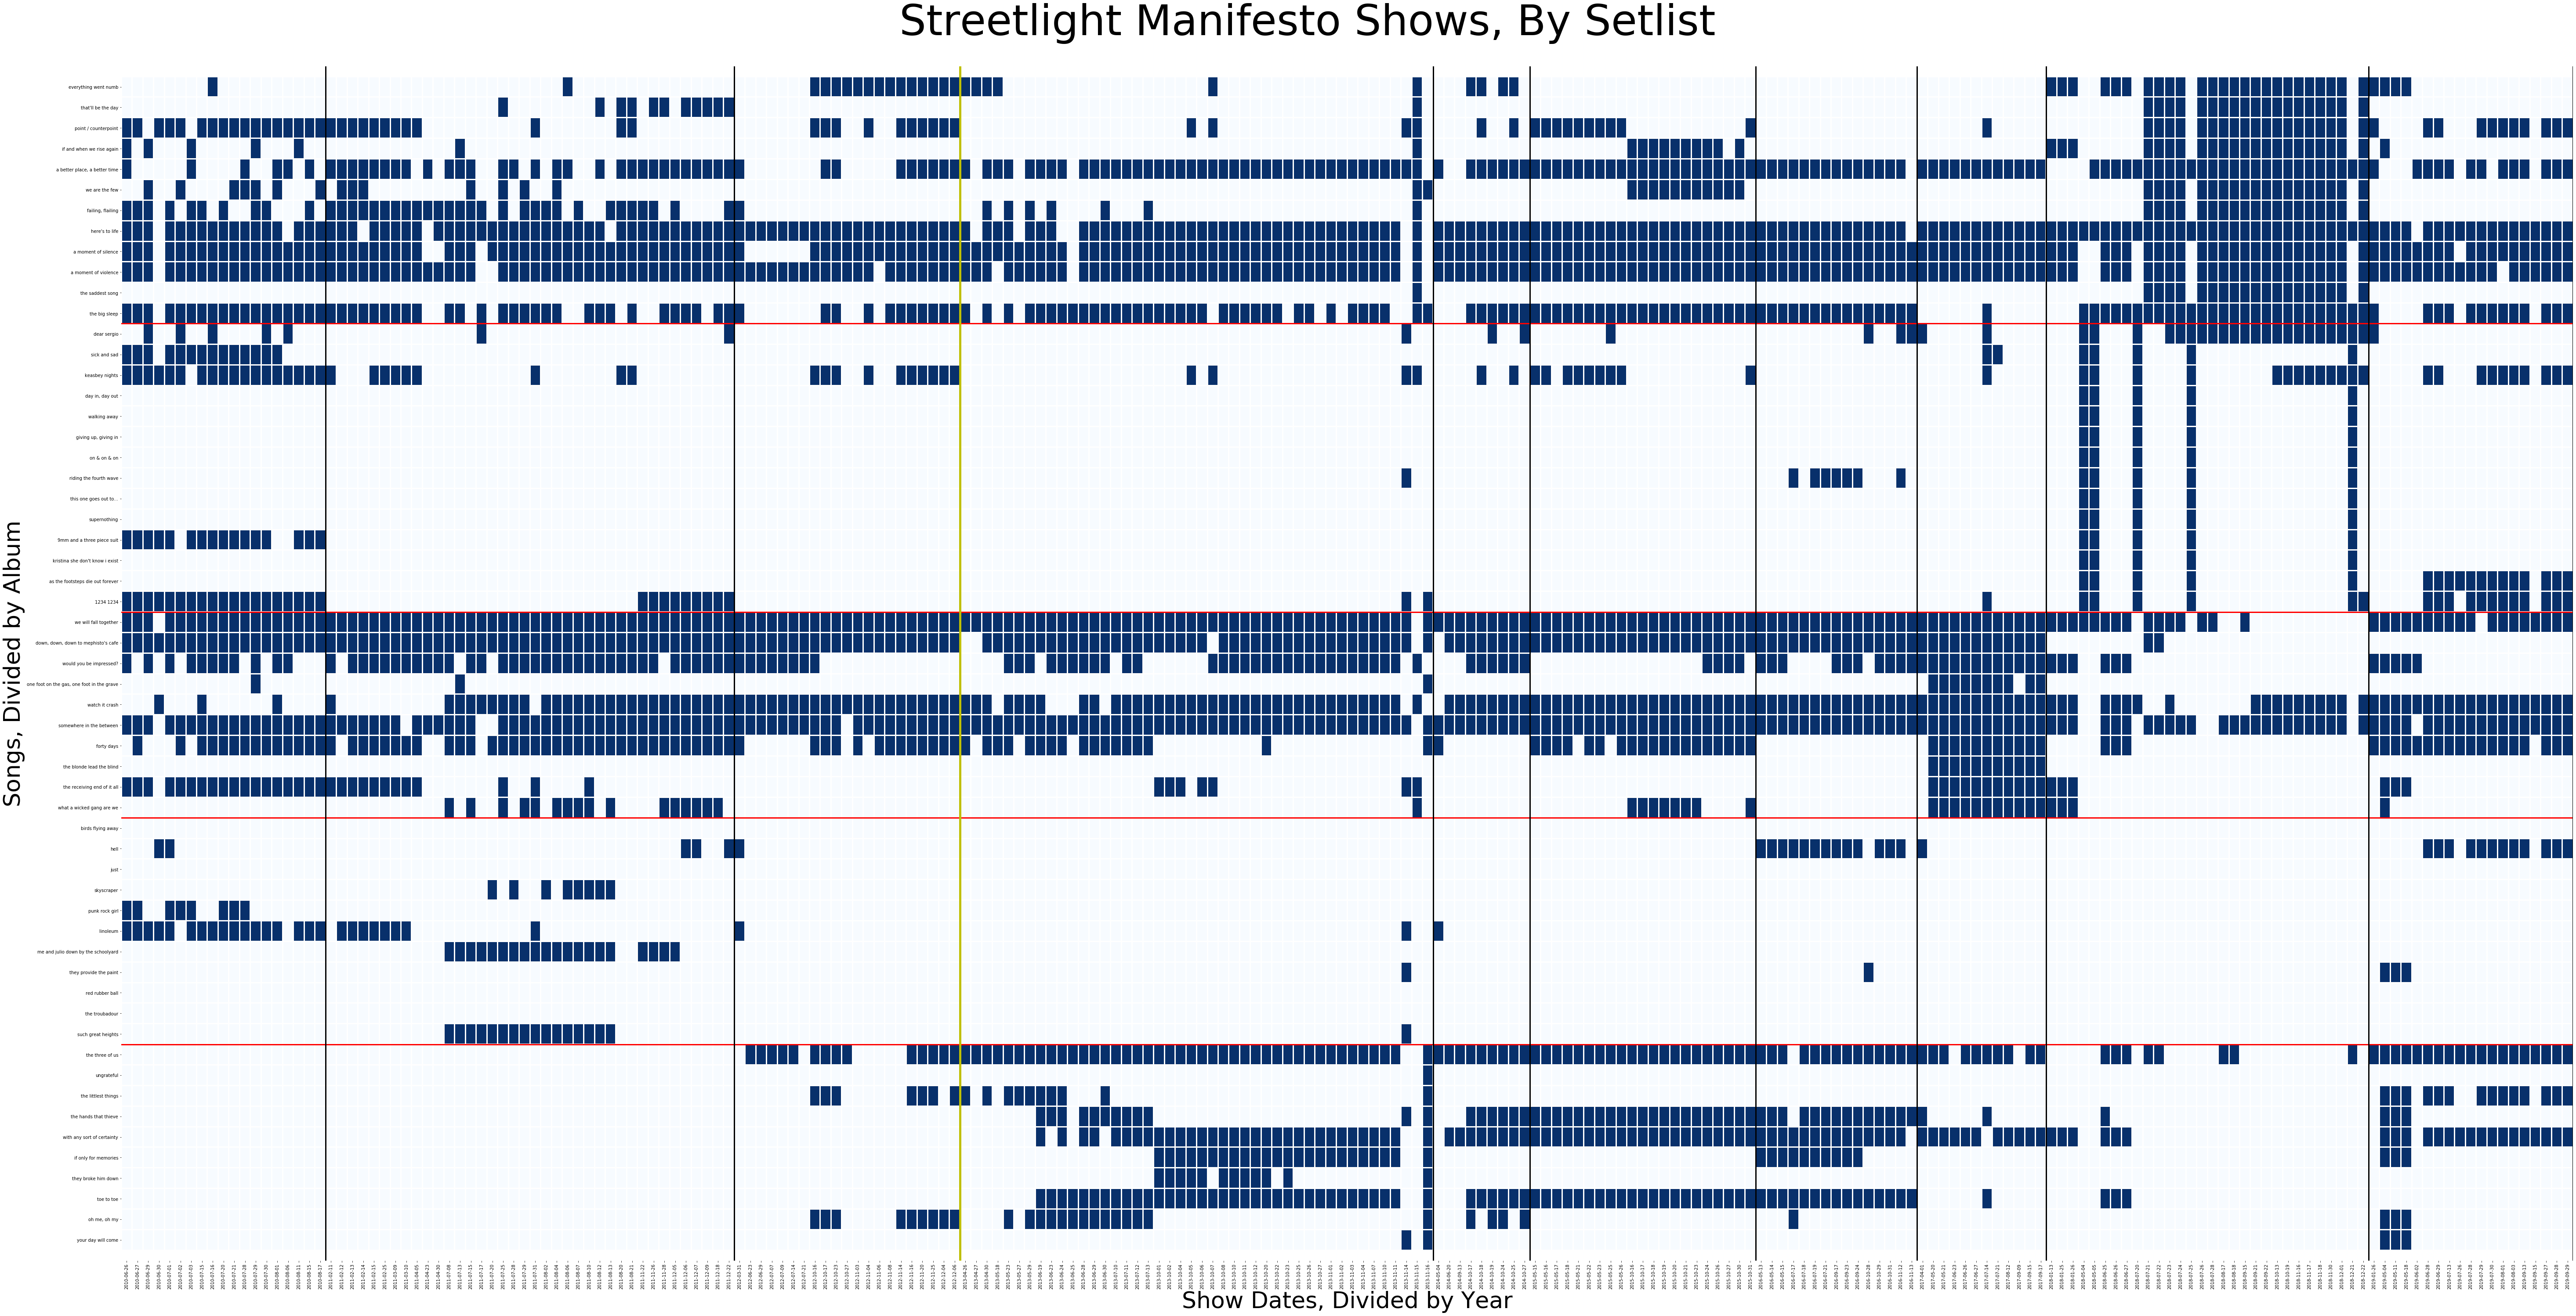

In [58]:
fig, ax = plt.subplots(figsize=(100, 50))

output = sns.heatmap(trimmed.T, ax=ax, cbar=False, cmap='Blues',
                     linewidths=2, color='white')

output.axhline(12, lw=3, c='r')
output.axhline(26, lw=3, c='r')
output.axhline(36, lw=3, c='r')
output.axhline(47, lw=3, c='r')

output.set_ylim(len(trimmed.T)+0.5, -.5)

output.xaxis.set_ticklabels(x.get_text()[:10] for x in output.xaxis.get_majorticklabels())

for idx in year_indexes[1:]:
    output.axvline(idx, lw=3, c='k')
    
output.axvline(78, lw=5, c='y')

fig.suptitle('Streetlight Manifesto Shows, By Setlist', x=.5, y=.92, fontsize=96);
output.set_ylabel('Songs, Divided by Album', fontsize=52)
output.set_xlabel('Show Dates, Divided by Year', fontsize=52)

plt.savefig('test.png')

### Spot Checking

In [17]:
song_counts = trimmed.sum()

In [18]:
loc = matplotlib.ticker.IndexLocator(base=1, offset=0.5)
fmtr = matplotlib.ticker.IndexFormatter(all_clean)

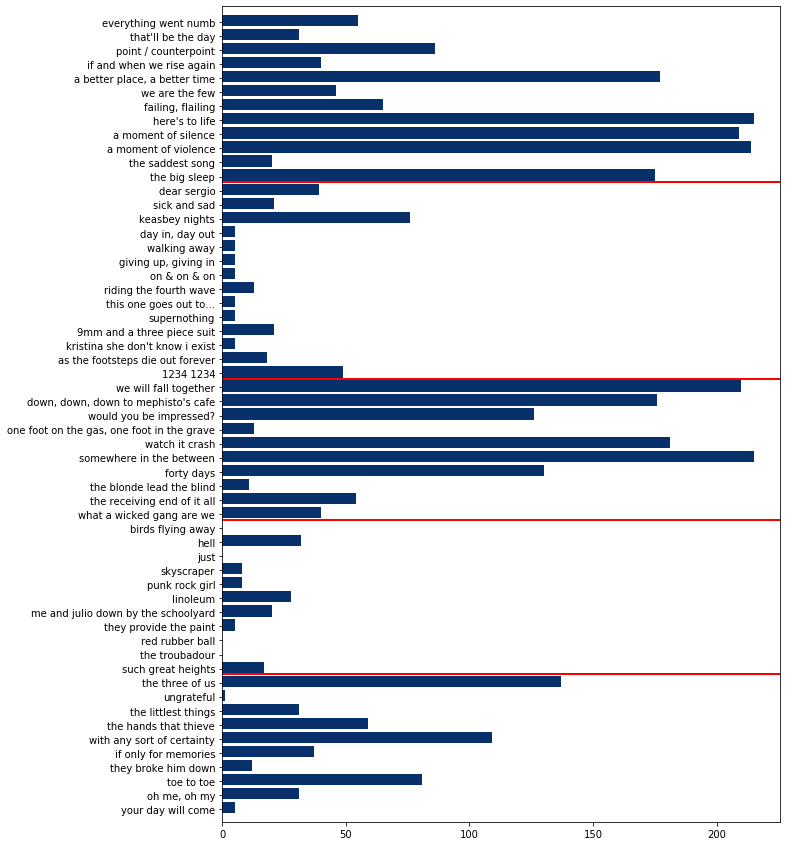

In [19]:
fig, ax = plt.subplots(figsize=(10, 15))

ax.barh(range(len(song_counts)), song_counts,
        color=((8/255, 48/255, 107/255, 255/255)))


ax.axhline(11.5, lw=2, c='r')
ax.axhline(25.5, lw=2, c='r')
ax.axhline(35.5, lw=2, c='r')
ax.axhline(46.5, lw=2, c='r')

ax.set_ylim(57, -1)
ax.yaxis.set_major_locator(loc)
ax.yaxis.set_major_formatter(fmtr)

In [20]:
df[df['punk rock girl'] == 1]

,everything went numb,that'll be the day,point / counterpoint,if and when we rise again,"a better place, a better time",we are the few,"failing, flailing",here's to life,a moment of silence,a moment of violence,...,the three of us,ungrateful,the littlest things,the hands that thieve,with any sort of certainty,if only for memories,they broke him down,toe to toe,"oh me, oh my",your day will come
2010-06-26,0,0,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-06-27,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-01,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-02,0,0,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-03,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-20,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-21,0,0,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2010-07-28,0,0,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
cooc = trimmed.T.dot(trimmed)

mask = np.zeros_like(cooc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

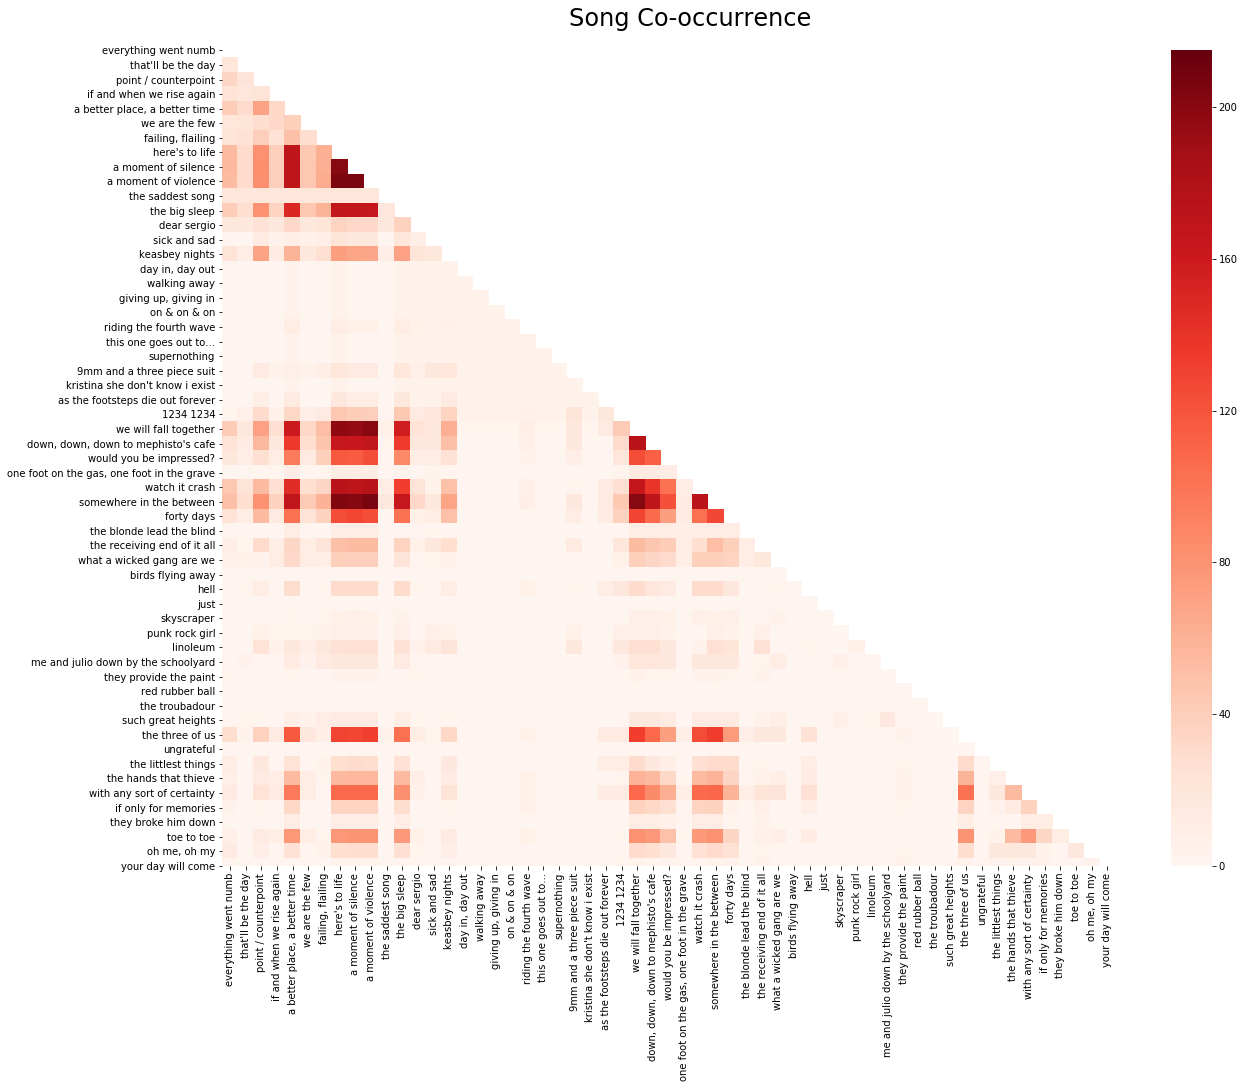

In [52]:
fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(cooc, ax=ax, mask=mask, cmap='Reds')
fig.suptitle('Song Co-occurrence', x=.45, y=.92, fontsize=24);

In [28]:
corr = trimmed.corr().dropna(how='all')

corr = corr[corr.index]

In [29]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

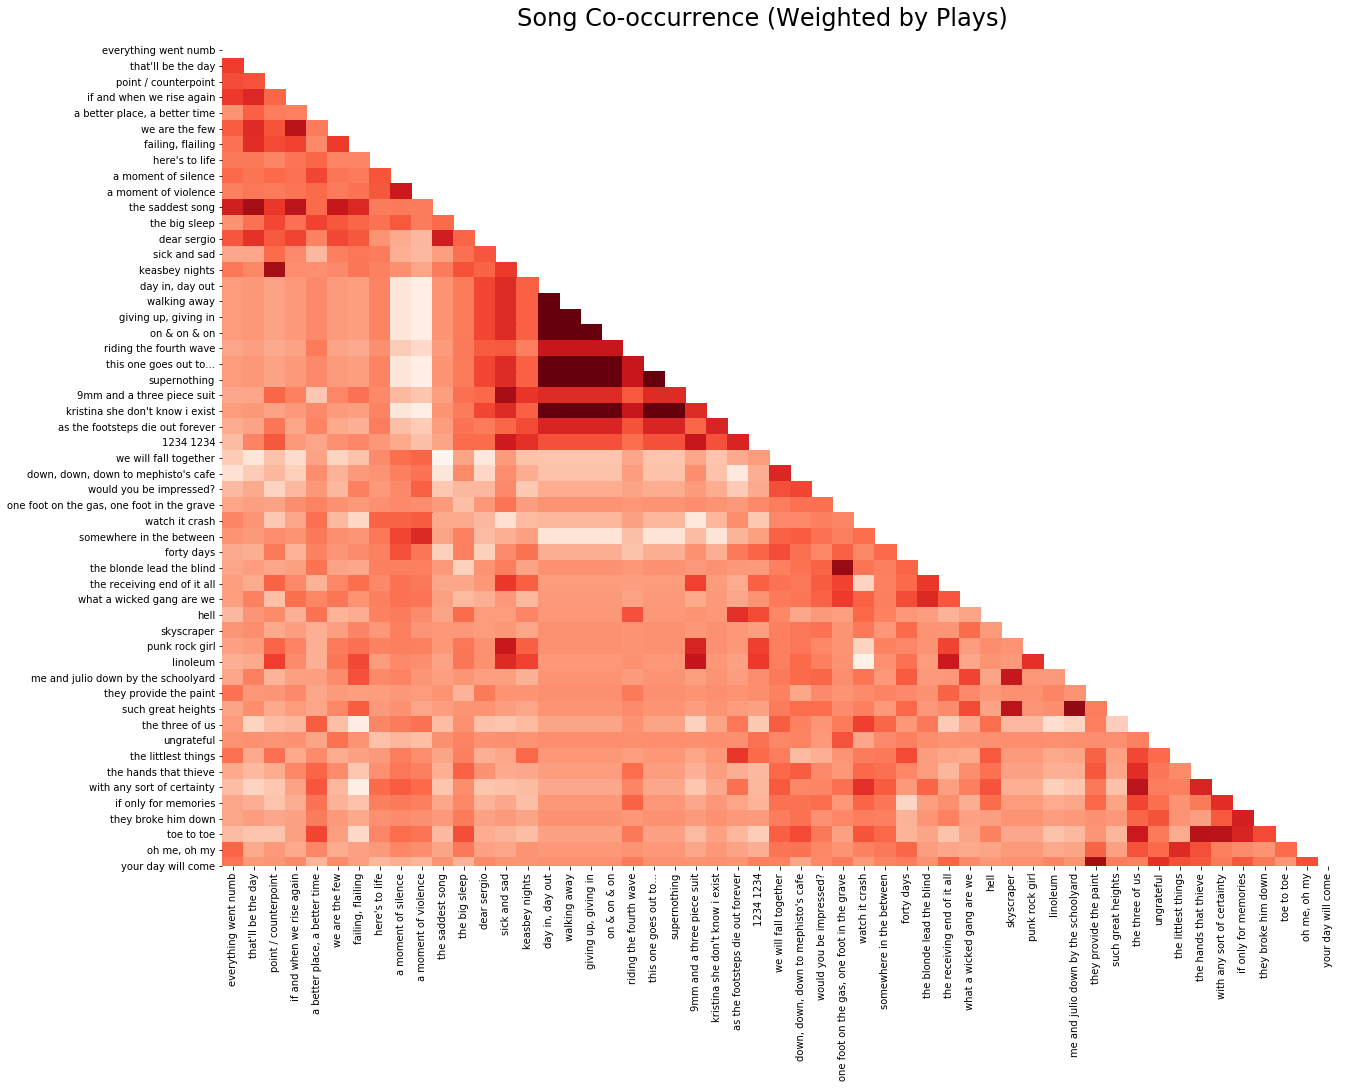

In [48]:
fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr, ax=ax, mask=mask, cmap='Reds',
            cbar=False);
fig.suptitle('Song Co-occurrence (Weighted by Plays)',
             x=.5, y=.92, fontsize=24);

### Chi Square

In [21]:
keasbey = all_clean[12:26]

In [22]:
keasbey_shows = trimmed[trimmed[keasbey].sum(axis=1) == len(keasbey)]

In [23]:
new = trimmed.loc[set(trimmed.index) - set(keasbey_shows.index)].sort_index()

In [24]:
before = new[new.index < '2019-06']
my_show = new[new.index == '2019-09-27']

In [53]:
before.sum()[keasbey]

dear sergio                         34
sick and sad                        16
keasbey nights                      61
day in, day out                      0
walking away                         0
giving up, giving in                 0
on & on & on                         0
riding the fourth wave               8
this one goes out to...              0
supernothing                         0
9mm and a three piece suit          16
kristina she don't know i exist      0
as the footsteps die out forever     0
1234 1234                           32
dtype: int64